In [1]:
# automatically reload edited source code
%load_ext autoreload
%autoreload 2

# external package imports
import numpy as np
import pandas as pd
import os, pdb, glob, time, argparse
from os.path import exists, split, isdir, getsize
from sdo_clv_pipeline.sdo_plot import *

# internal package imports
from sdo_clv_pipeline.paths import root
from sdo_clv_pipeline.sdo_io import *
from sdo_clv_pipeline.sdo_process import *
from sdo_clv_pipeline.sdo_io import * 

/Users/srugins/sdo-clv-pipeline/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# returns four sorted lists with the path to each of the file types
data_dir = os.path.abspath(os.path.join(os.getcwd(), "..", "data"))
con_files, mag_files, dop_files, aia_files = find_data(data_dir, "2014")
print(con_files)
print(len(con_files))
# print(con_files)
# print(mag_files)
# print(dop_files)
# print(aia_files)

File counts:
CON: 14
MAG: 14
DOP: 14
AIA: 15
[datetime.datetime(2014, 1, 13, 0, 0), datetime.datetime(2014, 1, 12, 0, 0), datetime.datetime(2014, 1, 5, 0, 0), datetime.datetime(2014, 1, 15, 0, 0), datetime.datetime(2014, 1, 9, 0, 0), datetime.datetime(2014, 1, 10, 0, 0), datetime.datetime(2014, 1, 7, 0, 0), datetime.datetime(2014, 1, 14, 0, 0), datetime.datetime(2014, 1, 16, 0, 0), datetime.datetime(2014, 1, 6, 0, 0), datetime.datetime(2014, 1, 17, 0, 0), datetime.datetime(2014, 1, 11, 0, 0), datetime.datetime(2014, 1, 3, 0, 0), datetime.datetime(2014, 1, 4, 0, 0)]
['/Users/srugins/sdo-clv-pipeline/data/hmi.ic_720s.20140103_000000_TAI.1.continuum.fits', '/Users/srugins/sdo-clv-pipeline/data/hmi.ic_720s.20140104_000000_TAI.1.continuum.fits', '/Users/srugins/sdo-clv-pipeline/data/hmi.ic_720s.20140105_000000_TAI.1.continuum.fits', '/Users/srugins/sdo-clv-pipeline/data/hmi.ic_720s.20140106_000000_TAI.1.continuum.fits', '/Users/srugins/sdo-clv-pipeline/data/hmi.ic_720s.20140107_000000_TAI.1

/Users/srugins/sdo-clv-pipeline/data


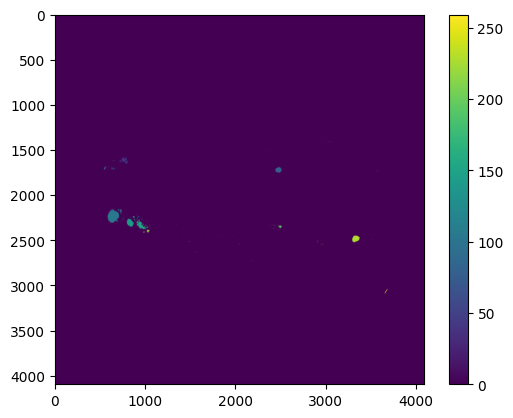

37
1993.0
81
3252.0
102
608.0
104
13450.0
140
4688.0
152
4664.0
193
656.0
228
4434.0
trying to plot...
0.76783574
0.28419474
0.7471291
0.8144325
0.6920839
0.6220091
0.28824863
0.78359497


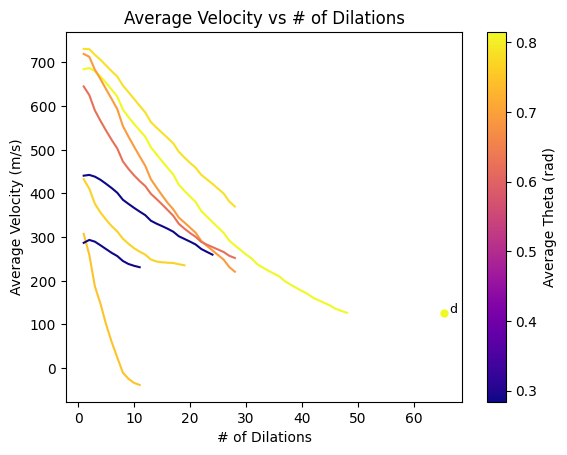

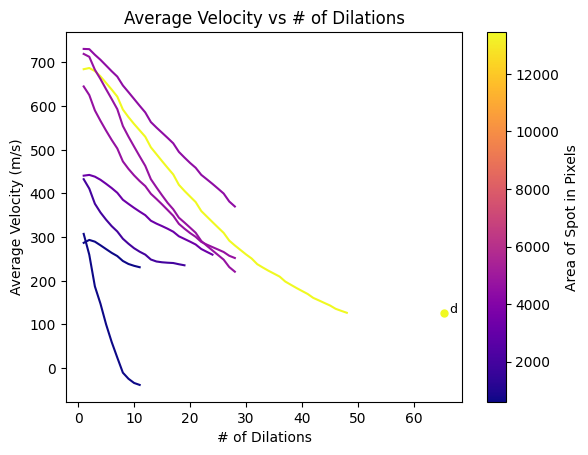

trying to plot...
0.76783574
0.28419474
0.7471291
0.8144325
0.6920839
0.6220091
0.28824863
0.78359497


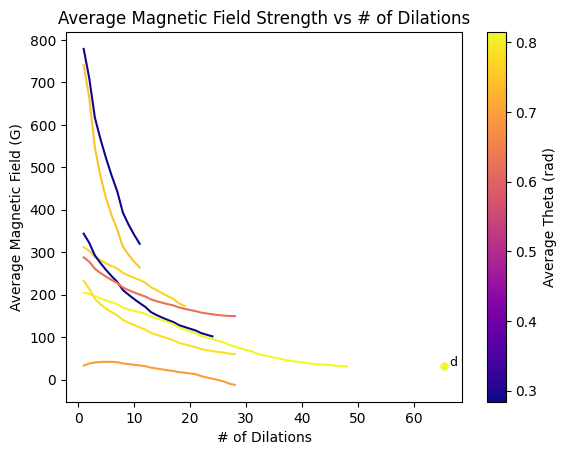

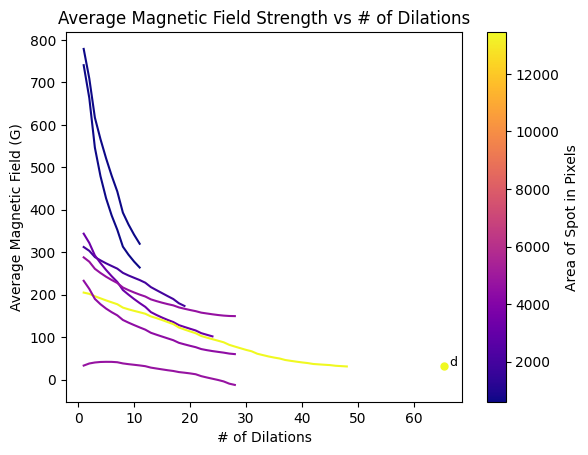

trying to plot...
0.76783574
0.28419474
0.7471291
0.8144325
0.6920839
0.6220091
0.28824863
0.78359497


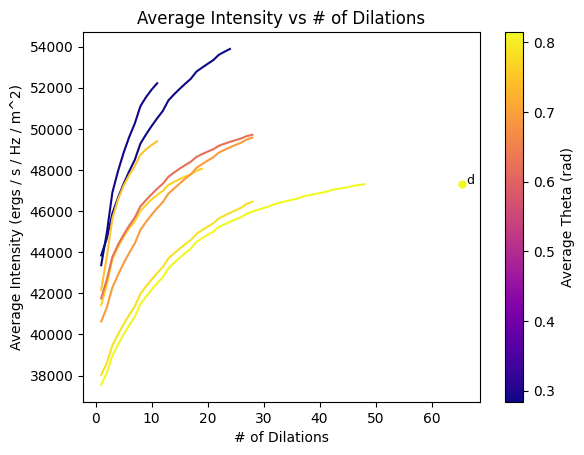

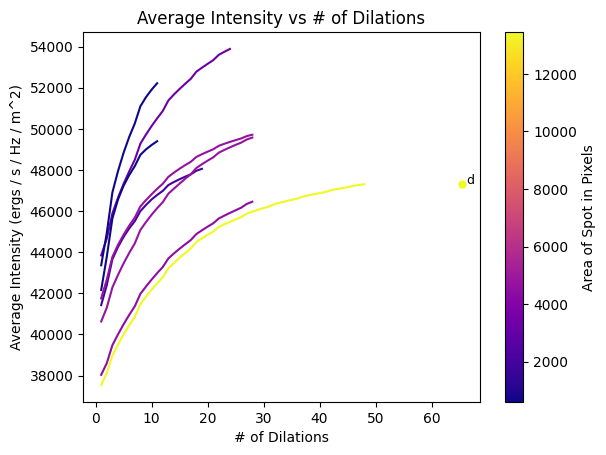

len moat pixels= 4096
shape moat pixels= (4096, 4096)
moat pixels


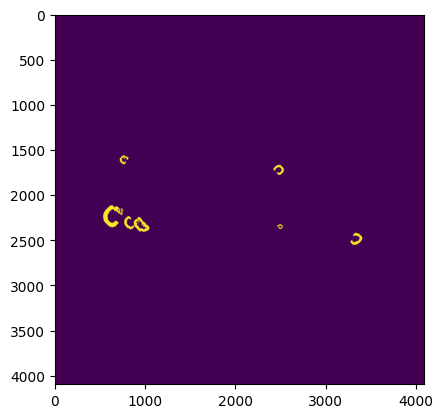

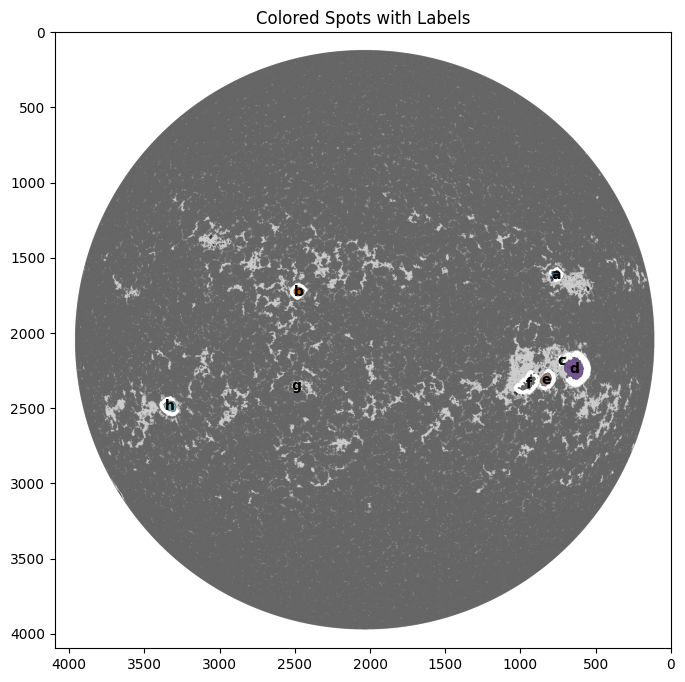

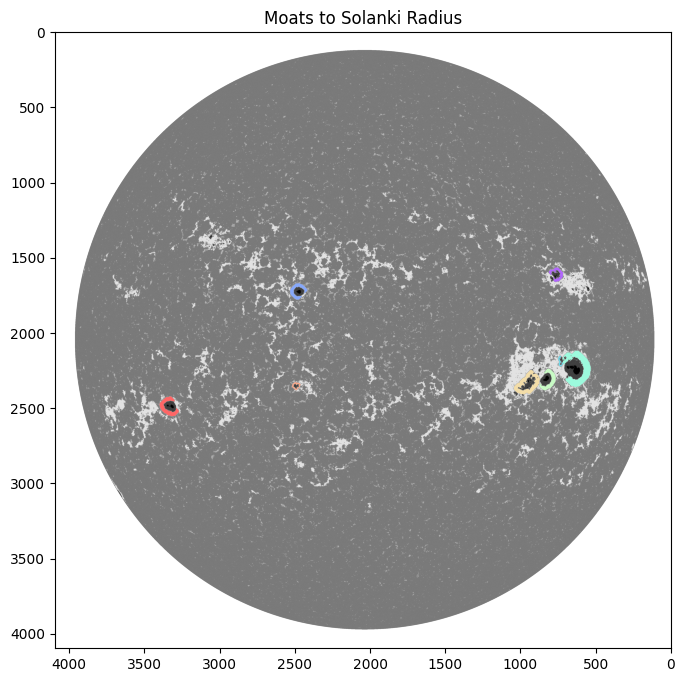

/Users/srugins/sdo-clv-pipeline/data


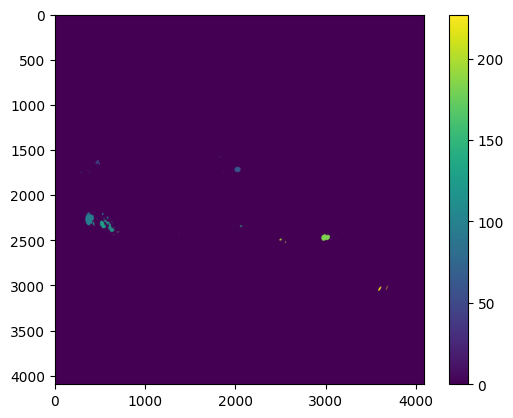

49
997.0
62
3172.0
96
9399.0
127
4361.0
129
3551.0
183
5173.0
221
776.0
trying to plot...
0.9923903
0.16934116
1.0437231
0.85848093
0.91692334
0.5730014
1.2710991


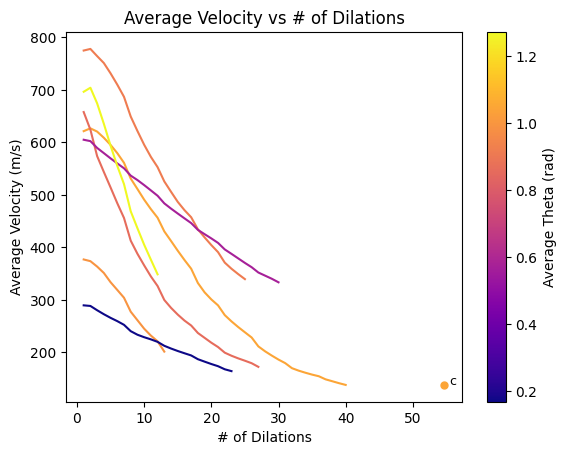

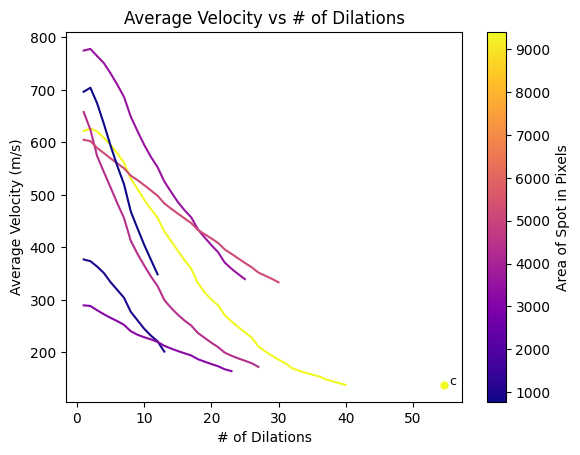

trying to plot...
0.9923903
0.16934116
1.0437231
0.85848093
0.91692334
0.5730014
1.2710991


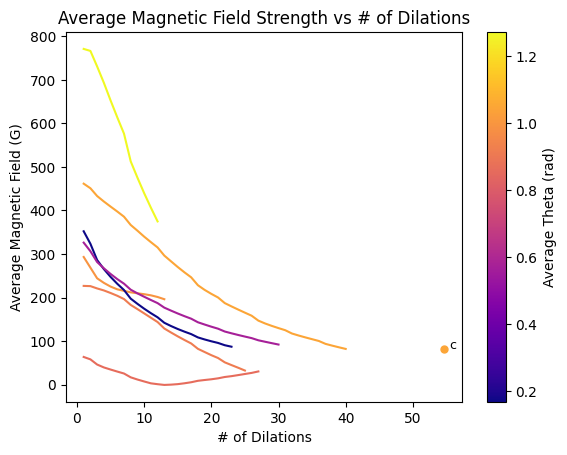

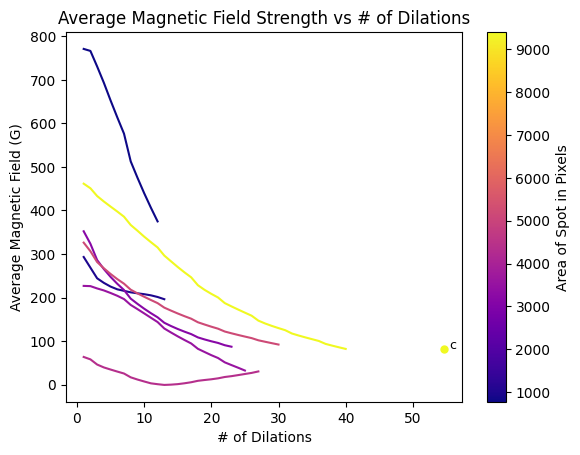

trying to plot...
0.9923903
0.16934116
1.0437231
0.85848093
0.91692334
0.5730014
1.2710991


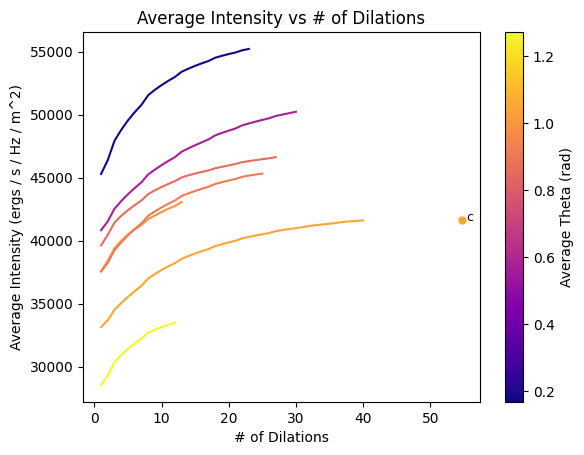

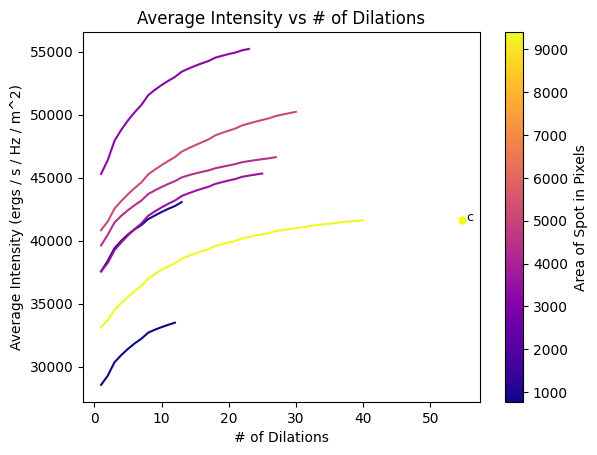

len moat pixels= 4096
shape moat pixels= (4096, 4096)
moat pixels


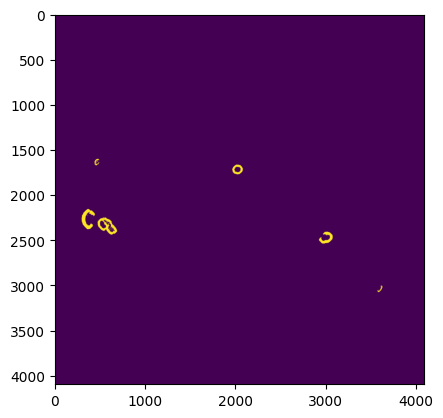

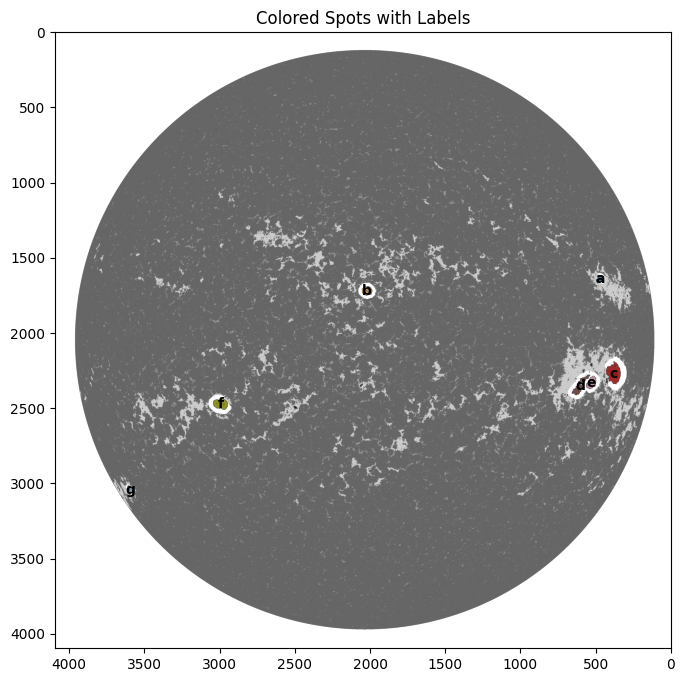

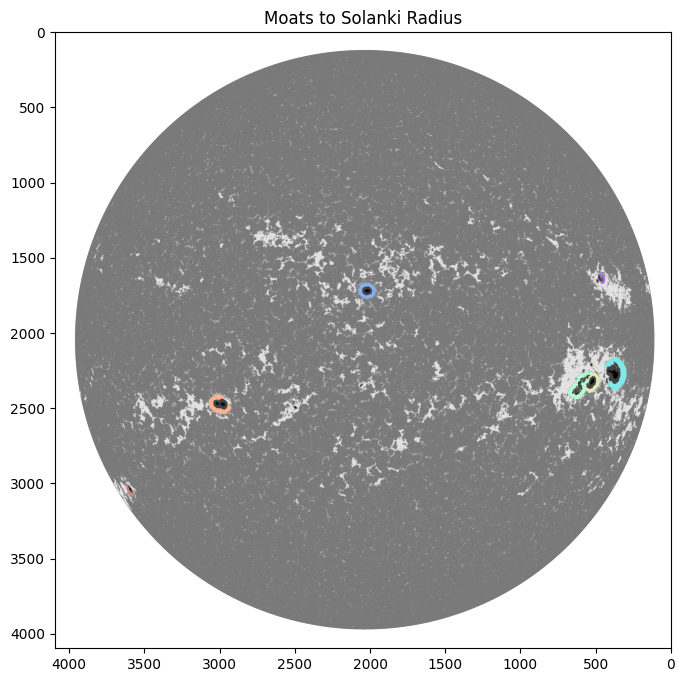

/Users/srugins/sdo-clv-pipeline/data


KeyboardInterrupt: 

In [ ]:
moat_vels = []
moat_mags = []
moat_ints = []
moat_dilations = []
moat_areas = []
moat_thetas = []
moat_vals = []
counter = -1
moat_avg_vels = []
symbol = []

for i in range (4, 7):
    # define the paths where files live
    con_file = os.path.join(data_dir, con_files[i])
    mag_file = os.path.join(data_dir, mag_files[i])
    dop_file = os.path.join(data_dir, dop_files[i])
    aia_file = os.path.join(data_dir, aia_files[i])
    print(data_dir)

    # create the SDOImage object instances
    con = SDOImage(con_file)     # continuum, Relative HMI continuum intensity
    mag = SDOImage(mag_file)     # magnetogram, magnetic field strength
    dop = SDOImage(dop_file)     # Dopplergram, LOS velocity
    aia = SDOImage(aia_file)     # AIA 1700 continuum filtergram, Relative 1700 Angstrom Continuum Intensity

    # do the coordinate transforms, etc.
    dop.calc_geometry()
    con.inherit_geometry(dop)
    mag.inherit_geometry(dop)

    aia.rescale_to_hmi(con) # reproject onto plate scale of HMI images

    # calculate the limb darkening correction
    con.calc_limb_darkening()
    aia.calc_limb_darkening()

    # correct magnetogram for foreshortening
    mag.correct_magnetogram()

    # calculate differential rot., meridional circ., obs. vel, grav. redshift, cbs
    dop.correct_dopplergram(fit_cbs=False)

    # set values to nan for mu less than mu_thresh
    mu_thresh = 0.1
    con.mask_low_mu(mu_thresh)
    dop.mask_low_mu(mu_thresh)
    mag.mask_low_mu(mu_thresh)
    aia.mask_low_mu(mu_thresh)

    counter += 1

    mask = SunMask(con, mag, dop, aia, moat_vels, moat_mags, moat_ints, moat_dilations, moat_thetas, moat_areas, moat_vals, counter, moat_avg_vels, symbol)
    mask.mask_low_mu(mu_thresh)

    label_moats_on_sun(mask)

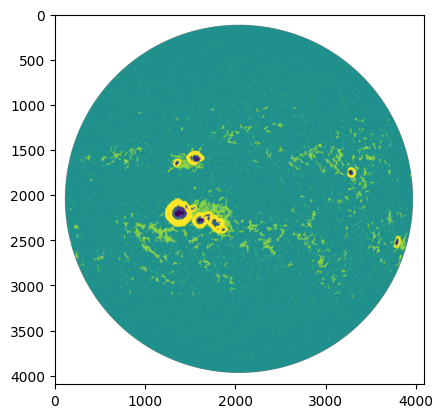

In [6]:
#plot_mask(mask)
plt.imshow(mask.regions)
